# Covariance - Positive

In [8]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
beer_data = pd.read_csv("https://raw.githubusercontent.com/hadrienj/essential_math_for_data_science/master/data/beer_dataset.csv")
beer_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


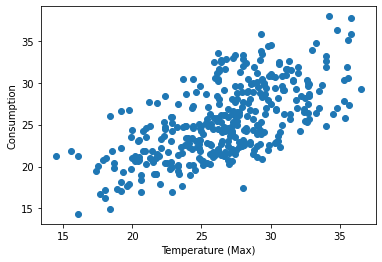

In [10]:
# PLot the consumption as a function of maximal temperature
plt.scatter(
    beer_data['Temperatura Maxima (C)'],
    beer_data['Consumo de cerveja (litros)'],
    cmap=0.5
)
plt.xlabel("Temperature (Max)")
plt.ylabel("Consumption")
plt.show()

In [11]:
# Calculating co-variance
x = beer_data['Temperatura Maxima (C)']
y = beer_data['Consumo de cerveja (litros)']

covar = (np.sum((x-x.mean())*(y-y.mean())))/x.shape[0]
print(f'Covariance: {covar}')

Covariance: 12.172649474197785


# Covariance - Negative

In [12]:
happ_data = pd.read_csv("https://raw.githubusercontent.com/hadrienj/essential_math_for_data_science/master/data/happiness_2020.csv")
happ_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


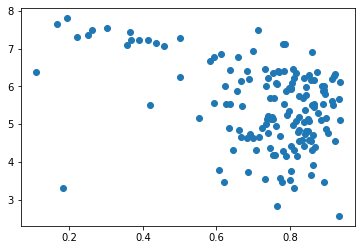

In [13]:
X = happ_data['Perceptions of corruption']
Y = happ_data['Ladder score']
plt.scatter(X,Y, cmap=0.5)

In [18]:
covar = np.cov(X,Y)
print(f'Covariance matrix: \n {covar}')
# covariance is the value outside of the diagonal: -0.08 in this case

Covariance matrix: 
 [[ 0.03068538 -0.08150217]
 [-0.08150217  1.23714494]]


# Correlation

* A correlation of -1 means that there is a perfect negative linear relationship and a correlation of 1 indicates a perfect positive linear relationship. A correlation of 0 indicates that the variables are uncorrelated (no linear relationship).

In [16]:
# Taking the consumption of beer as a function of temperature.
np.corrcoef(x,y)

# Correlation is advantageous because you can compare it between pairs of variables since it not depends on the scale of the data.

array([[1.        , 0.64267247],
       [0.64267247, 1.        ]])

# Simulation of the Dice Experiment - Probability Distribution (PMF)


In [19]:
# You call X the random variable corresponding to this experiment. Assuming that the die is fair,
# each outcome is equiprobable: if you run the experiment a large number of times, you will get
# each outcome approximately the same number of times.

rolls = np.random.randint(1,7,20) # Rolling dice 20 time
print(rolls)

[3 4 1 3 6 4 5 3 2 2 6 3 5 1 6 1 6 1 5 2]


<StemContainer object of 3 artists>

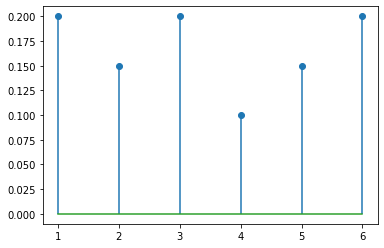

In [20]:
# Assuming the die is fair, you should have an uniform distribution, that is,equiprobable outcomes.
# Let’s visualize the quantity of each outcome you got in the random experiment.

val, counts = np.unique(rolls, return_counts=True)
plt.stem(val, counts/len(rolls), basefmt="C2-", use_line_collection=True)

<StemContainer object of 3 artists>

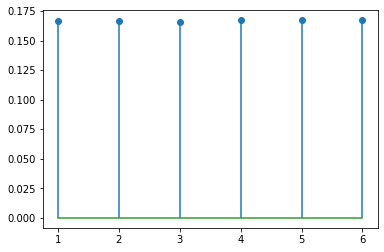

In [21]:
# With a uniform distribution, the plot would have the same height for each outcome.
# However, the distribution shown in above plot doesn’t look uniform. That’s because you didn’t repeat the experiment
# enough: the probabilities will stand when you repeat the experiment a large number of times

throws = np.random.randint(1,7,100000)
val, counts = np.unique(throws, return_counts=True)
plt.stem(val, counts/len(throws), basefmt='C2-', use_line_collection=True)